<a href="https://colab.research.google.com/github/Clairemcli/ECE147/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2025, Prof. J.C. Kao, TAs: B. Qu, K. Pang, S. Dong, S. Rajesh, T. Monsoor, X. Yan

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x + 2x^2 -3x^3 + \epsilon$

Text(0, 0.5, '$y$')

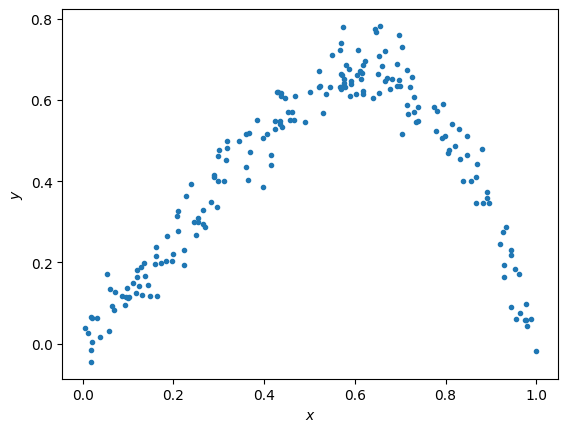

In [5]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.05, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The distribution of x is a uniform distribution with paramers 0 and 1 so the values of the distribution are between 0 and 1.

(2) The distribution of the additive noise is a normal distribution with a mean 0 and standard deviation 0.05.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [7]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))
# adds column of ones to original x data

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

x_trans = xhat.T
theta = np.linalg.inv(x_trans.T.dot(x_trans)).dot(x_trans.T.dot(y))
# θ=argmin||y-Xθ||^2
# θ = (X^T.X)^(-1)X&^TY

# ================== #
# END YOUR CODE HERE #
# ================== #

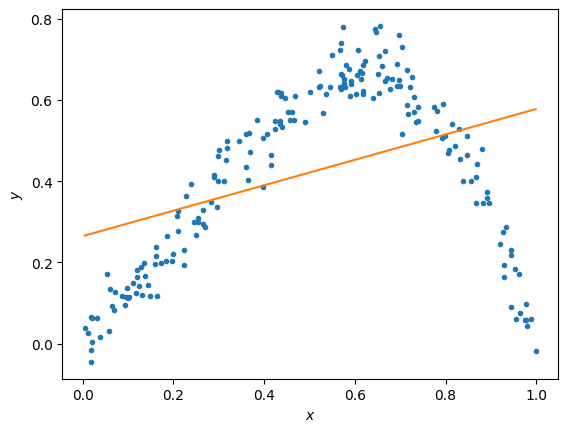

In [8]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data, as the data has the appearance of a polynomial function but the linear model takes on the shape of a line.

(2) To improve fitting, we can increase the complexity of the model, using a function with more polynomial terms such as a quadratic model.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [19]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

# y = θ0 + θ1x + θ2x^2 + ... + θix^i

for i in range(1, N+1):
  xhat = np.ones_like(x)
  for j in range(1, i+1):
    # X = [1 x x^2 ... x^(i+1)]
    xhat = np.vstack((x**j, xhat))

  # x_trans = X^T
  x_trans = xhat.T
  # θ = (X^T.X)^(-1)X&^TY
  theta = np.linalg.inv(x_trans.T.dot(x_trans)).dot(x_trans.T.dot(y))

  xhats.append(x_trans)
  thetas.append(theta)

# ================== #
# END YOUR CODE HERE #
# ================== #

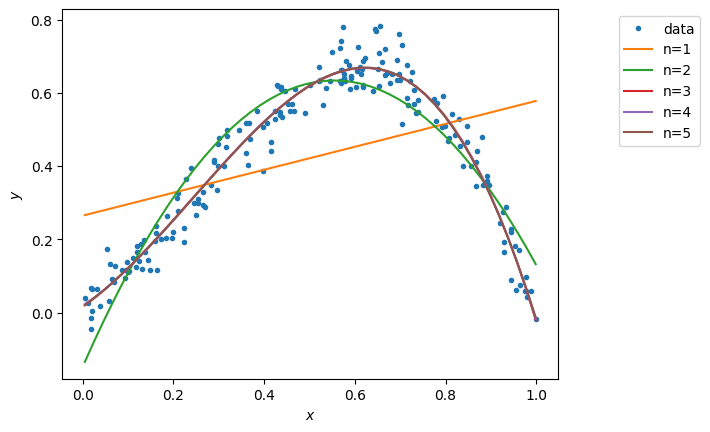

In [17]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [28]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.

for i in range(N):
  diff = y - xhats[i].T.dot(thetas[i])
  training_errors.append(diff.dot(diff)/num_train)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.041899148752618985, 0.005860281754804516, 0.002269334389195936, 0.0022681538153602712, 0.0022670775543125817]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The polynomial with the best training data was the 5th-order polynomial as it had the lowest training error.

(2) This is expected as higher-order models are expected to do at least as good as models with a lower order function. Higher-order models have more demnsions to fit to the exact shape of the data.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

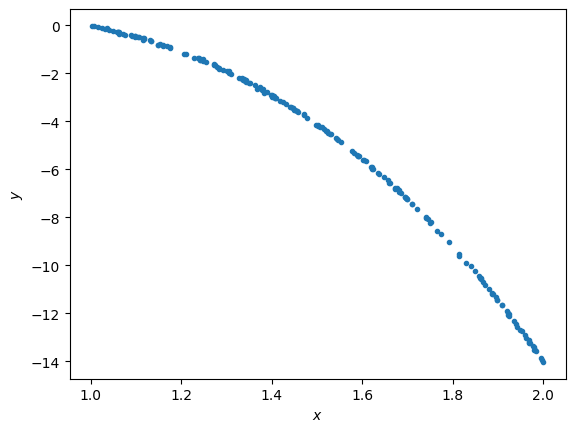

In [32]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [33]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))

    xhats.append(xhat)

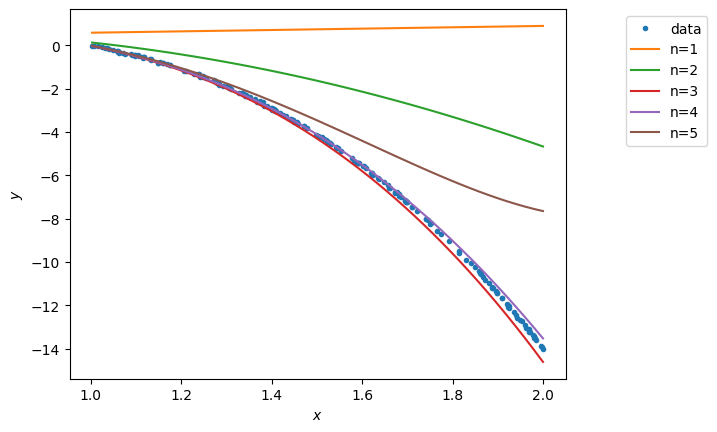

In [34]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [36]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.

for i in range(N):
  diff = y - xhats[i].T.dot(thetas[i])
  testing_errors.append(diff.T.dot(diff)/num_train)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [54.24631771601227, 18.91115921753081, 0.08693862570381264, 0.03042966867000048, 5.954356338935129]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The model with the best testing error was the 4th-order model as it has the lowest testing error.

(2) Models of order 5 may not generalize well because they are overfit to the training data. As a result, the model may pick up patterns that are common to the training set but are not actually common features of general cases.